# Simple Sale Analysis

## Install modules

In [19]:
!pip install matplotlib

     |████████████████████████████████| 7.3 MB 2.0 MB/s eta 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     |████████████████████████████████| 229 kB 88.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 179.9 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 14.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 75.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/pongthornchumpoo/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


## import modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task1 : read data from the csv file to a dataframe.

In [4]:
df = pd.read_csv("./sales_data_sample.csv",encoding='Latin-1')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [7]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,...,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,...,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,...,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,12/1/2003 0:00,Shipped,4,12,2003,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [12]:
#see the structure of the table (numbers of row and column resepectively).
df.shape 

(2823, 25)

In [13]:
#see names of column and their data types.
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

## Question 1: How many order nos in each  year ?

### query data

In [94]:
#get a list of years and a list of total order nos in each years.
all_order = df.groupby(['YEAR_ID'])['ORDERNUMBER'].count()
print(type(all_order)) #series
sale_years = []
whole_year_sales = []
for indx,value in all_order.items():
    sale_years.append(indx)
    whole_year_sales.append(value)
    
sale_years # [2003,2004,2005]
whole_year_sales # [1000, 1345, 478] 


<class 'pandas.core.series.Series'>


[1000, 1345, 478]

### plot a graph

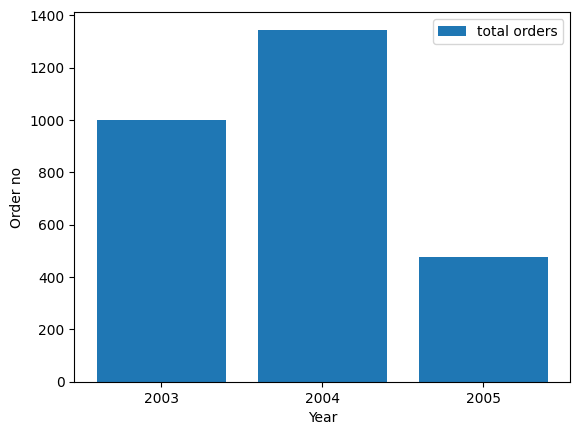

In [95]:
x_axis = np.arange(len(sale_years))
plt.bar(x_axis,whole_year_sales,width = 0.8, label = 'total orders')
plt.xticks(x_axis,sale_years)
plt.xlabel('Year')
plt.ylabel('Order no')
plt.legend()
plt.show()

## Question 2: How many order number in each  quarter in 2003 ?

### query data

In [74]:
all_2003_orders = df[df['YEAR_ID'] == 2003].groupby('QTR_ID').size()
print(type(all_order)) #series
all_order
quarters = [index for index,_ in all_2003_orders.items()]
sum_per_quarter = [val for _,val in all_2003_orders.items()]
quarters #[1,2,3,4]
sum_per_quarter #[130, 162, 184, 524]



<class 'pandas.core.series.Series'>


[130, 162, 184, 524]

### plot a  graph

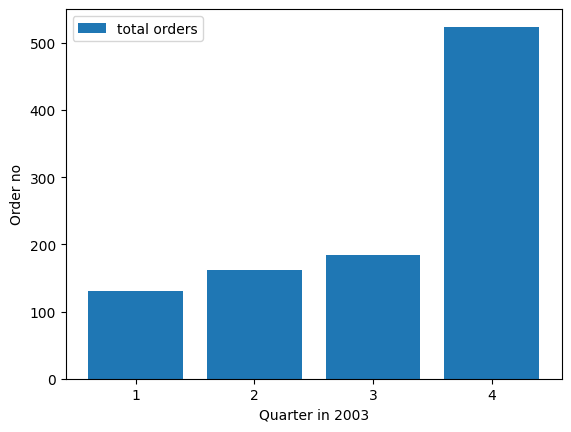

In [90]:
x_axis = np.arange(len(quarters))
plt.bar(x_axis,sum_per_quarter,width=0.8, label='total orders')
plt.xticks(x_axis,quarters)
plt.xlabel('Quarter in 2003')
plt.ylabel('Order no')
plt.legend()
plt.show()

## Question 3: What month in 2003 has the most order nos?

### query data

In [113]:
orders = df[df['YEAR_ID'] == 2003].groupby('MONTH_ID')['ORDERNUMBER'].count()
month_ids = [index for index,_ in orders_by_month.items()]
orders_by_month = [val for _,val in orders_by_month.items()]
orders

MONTH_ID
1      39
2      41
3      50
4      58
5      58
6      46
7      50
8      58
9      76
10    158
11    296
12     70
Name: ORDERNUMBER, dtype: int64

In [114]:
#find the month that has the most order no
max_month = orders.idxmax()
max_month # 11 i.e. November

11

### plot a graph

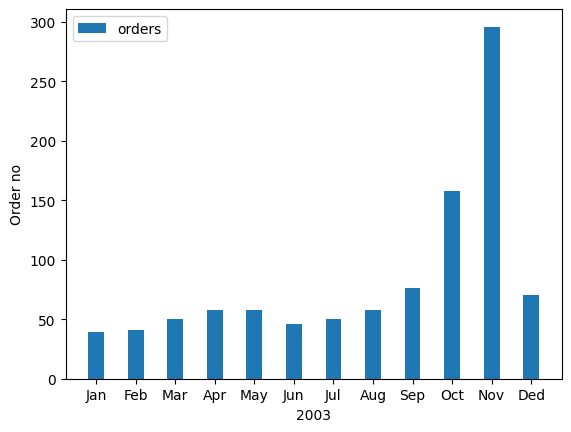

In [118]:
x_axis = np.arange(len(month_ids))
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Ded']
plt.bar(x_axis,orders_by_month,width = 0.4 ,label='orders')
plt.xticks(x_axis,month_names)
plt.xlabel('2003')
plt.ylabel('Order no')
plt.legend()
plt.show()